In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
sns.set()
warnings.filterwarnings('ignore')

## Basic Data Science and ML Pipeline

O - Obtaining our data

S - Scrubbing / Cleaning our data

E - Exploring / Visualizing our data will allow us to find patterns and trends

M - Modeling our data will give us our predictive power as a wizard

N - INterpreting our data

In [4]:
# Loading the dataset
df = pd.read_csv('C:\\Users\\Admin\\Desktop\\datasets\\diabetes-pima-ind.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Basic Statistical Analysis

In [7]:
# gives information about the data types, columns, null value, counts, memeory usage

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### DataFrame.describe() :
method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

Now, let's understand the statistics that are generated by the describe() method:

count tells us the number of NoN-empty rows in a feature.

mean tells us the mean value of that feature.

std tells us the Standard Deviation Value of that feature.

min tells us the minimum value of that feature.

25%, 50%, and 75% are the percentile/quartile of each features. This 

quartile information helps us to detect Outliers.

max tells us the maximum value of that feature.

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As we know that following columns cannot have '0' as their value:

1. Glucose

2.Blood Pressure

3.Skin Thickness

4.Insulin

5.BMI

So, it better to replace them with NaN since after that counting them would be easier and they could easily be replaced by suitable values.

In [10]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] =\
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)


In [11]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

#### To fill these NaN values the data distribution needs to be understood

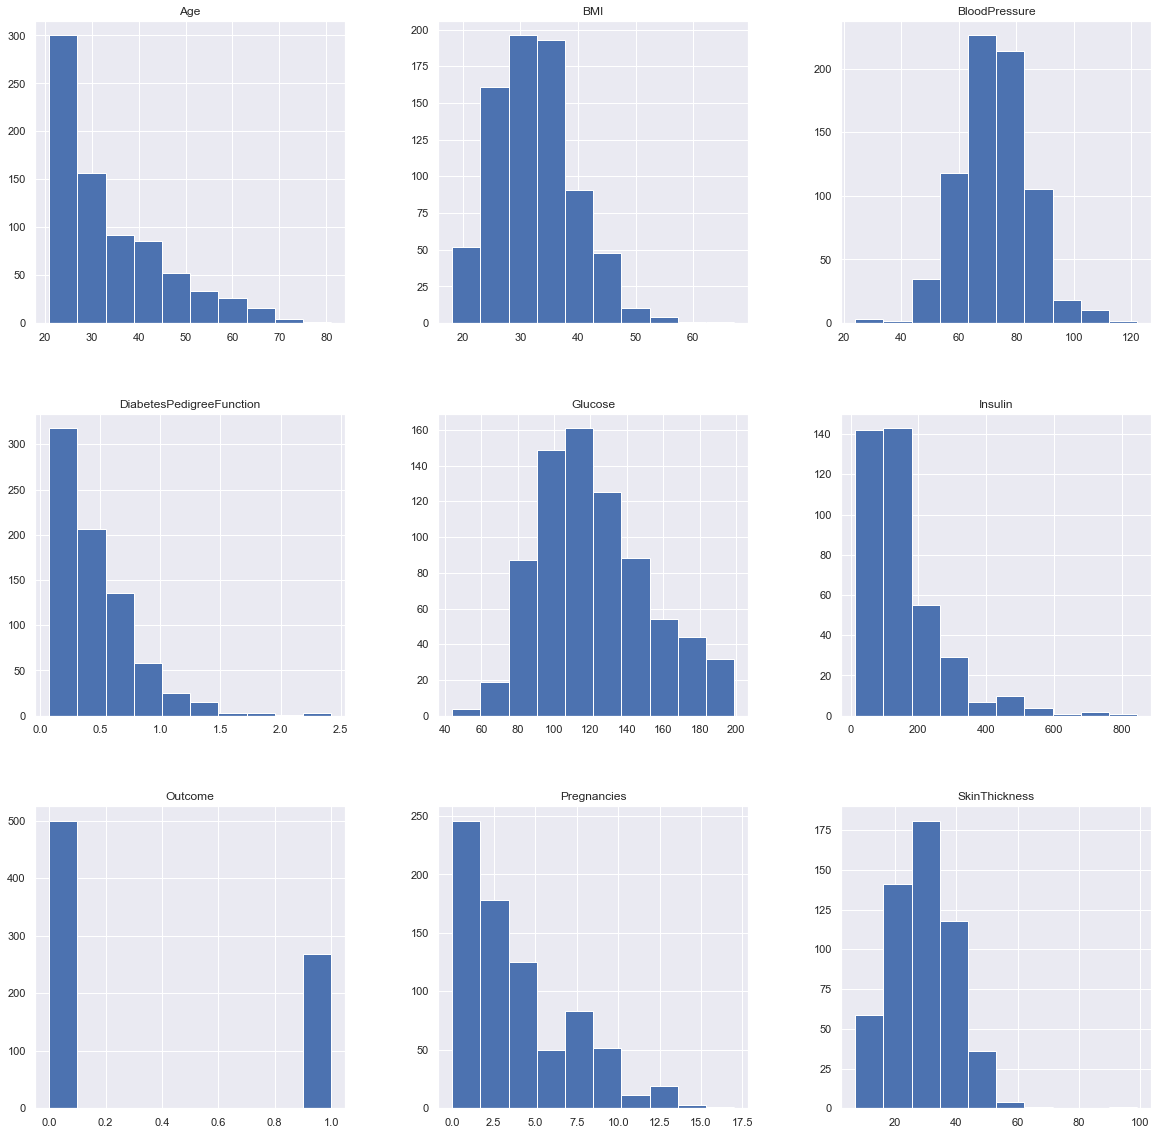

In [13]:
df.hist(figsize = (20,20))
plt.show()

### Filling the NaN values with the suitable values

In [14]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)

df['BloodPressure'].fillna( df['BloodPressure'].mean(), inplace = True)

df['SkinThickness'].fillna( df['SkinThickness'].median(), inplace = True)

df['Insulin'].fillna( df['Insulin'].median(), inplace = True)

df['BMI'].fillna( df['BMI'].median(), inplace = True)

### PLotting after NaN removal

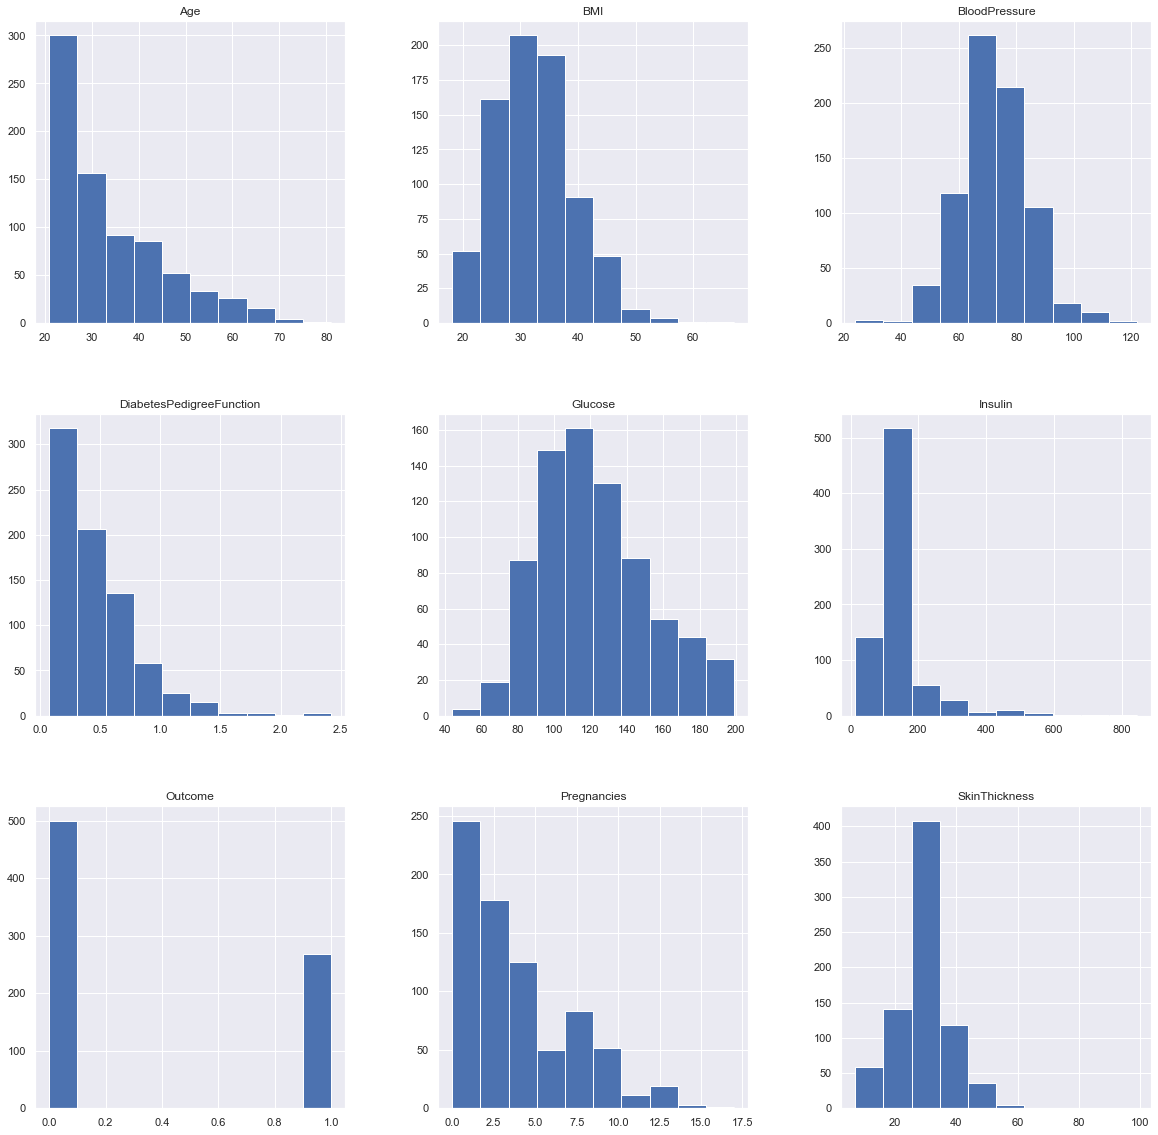

In [16]:
df.hist(figsize = (20,20))
plt.show()

In [17]:
# Observing the shape of the data
df.shape

(768, 9)

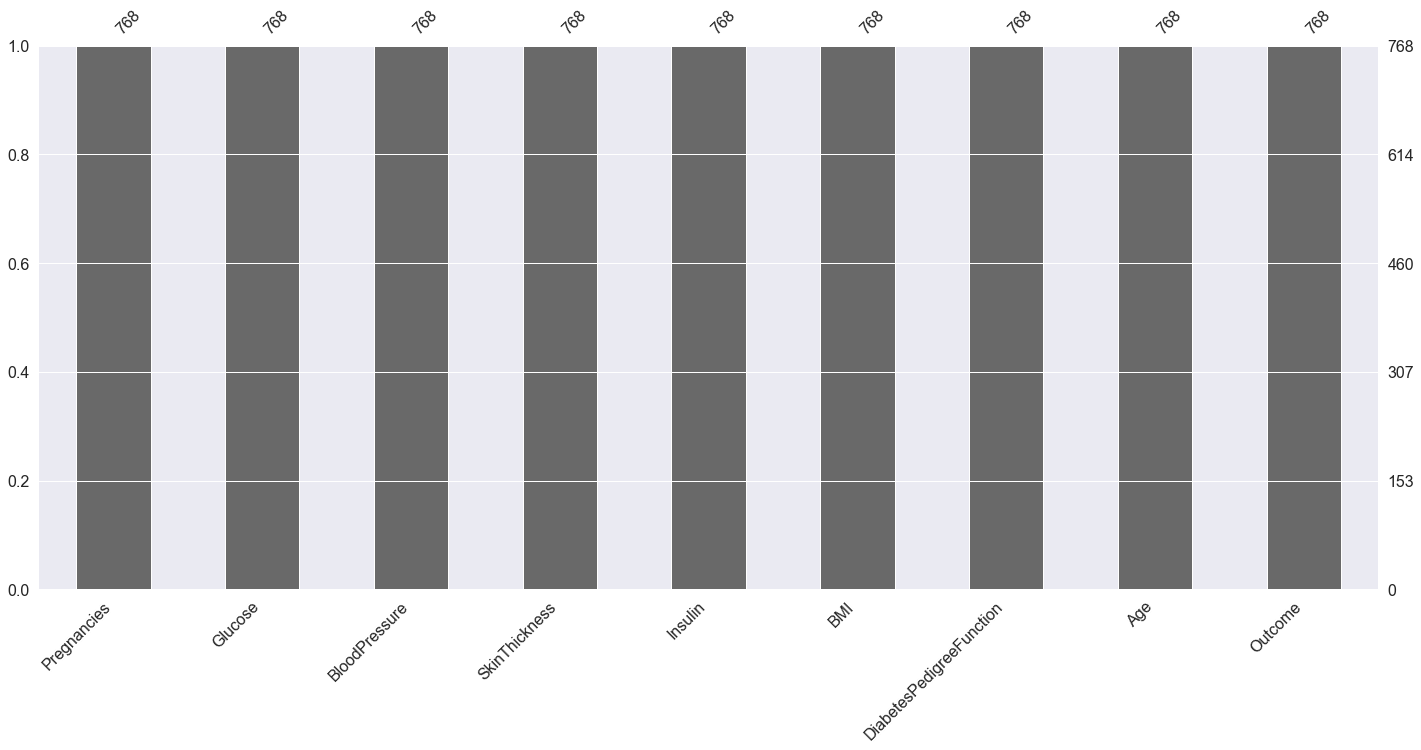

In [21]:
## NUll count analysis
import missingno as msno
msno.bar(df)

0    500
1    268
Name: Outcome, dtype: int64


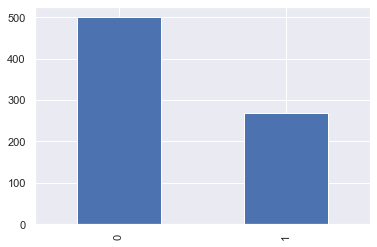

In [24]:
# Checking the balance of the data by plotting the count of outcomes by their value

print(df.Outcome.value_counts())
df.Outcome.value_counts().plot(kind = 'bar')

The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

### Scatter Matrix of data

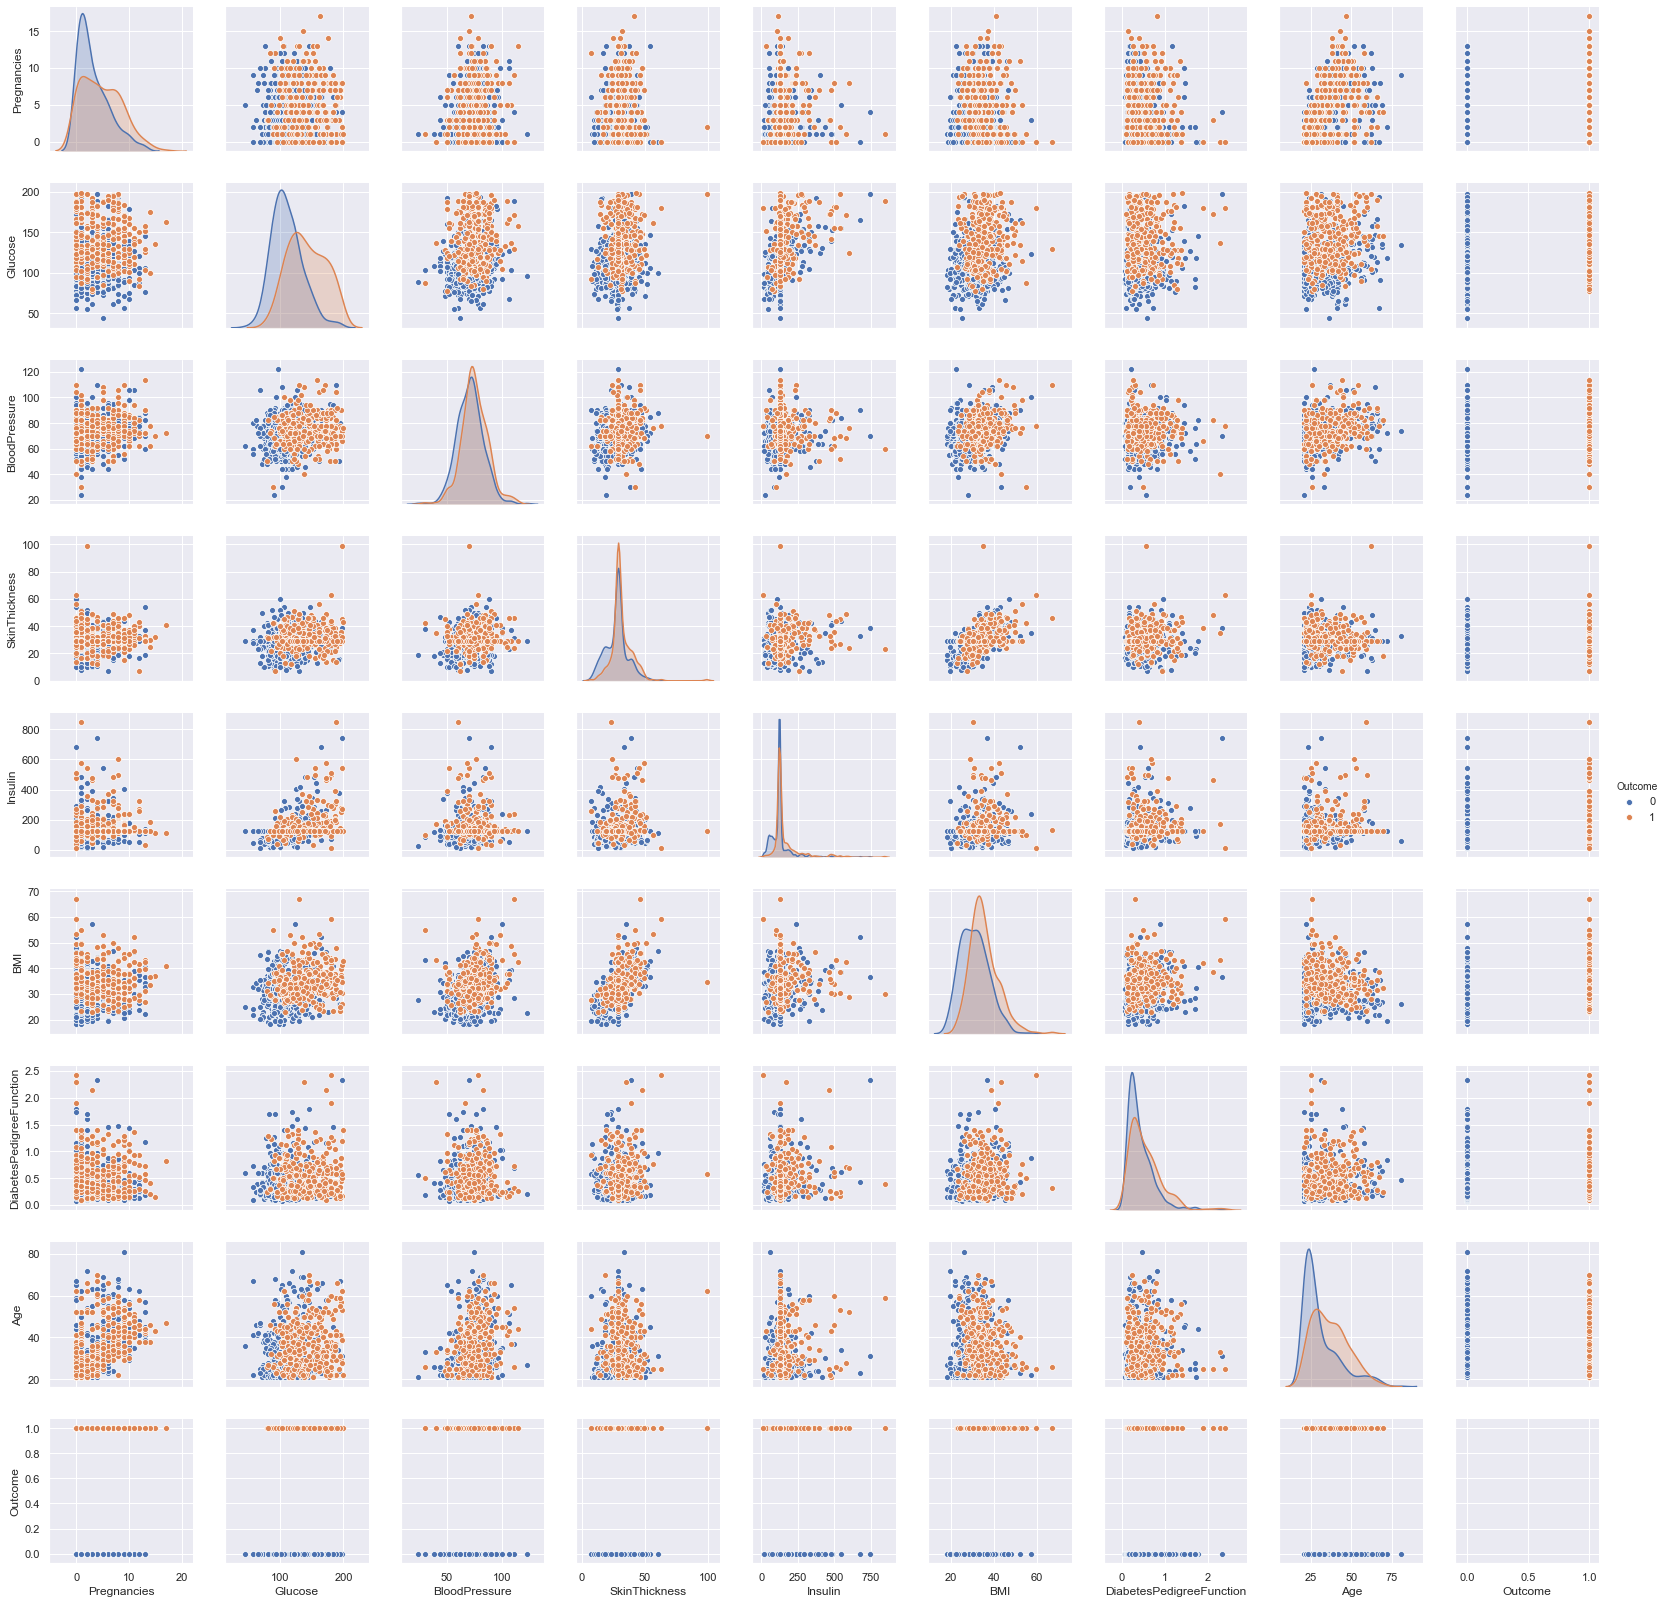

In [26]:
sns.pairplot(df, hue = 'Outcome')

### Correlation Heatmap 

In [31]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


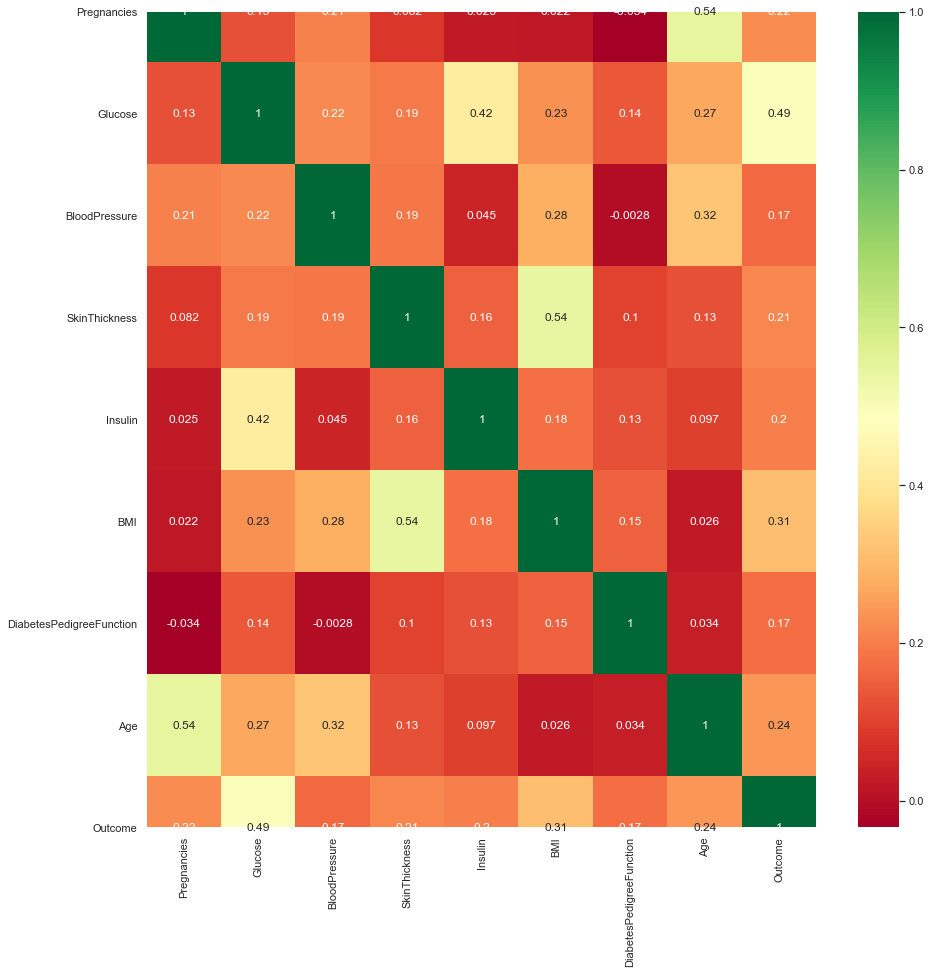

In [30]:
plt.figure( figsize = (15, 15))
sns.heatmap( df.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

### Scaling the data

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
df_copy = df.copy()

In [37]:
sc = StandardScaler()

X = df.drop('Outcome', axis = 1)

In [41]:
X = sc.fit_transform(X)

In [42]:
X

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.0158134 , -0.69530596, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.29912651,
        -0.47378505, -0.87137393]])

In [43]:
df_x = pd.DataFrame(X, columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [44]:
df_x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.680125,0.297376,2.150354,0.455573,0.064737,-0.908682,2.532136
764,-0.547919,0.010298,-0.198965,-0.239949,-0.181541,0.632365,-0.398282,-0.531023
765,0.342981,-0.022579,-0.033518,-0.695245,-0.332132,-0.910418,-0.685193,-0.275760
766,-0.844885,0.141808,-1.026200,-0.012301,-0.181541,-0.342790,-0.371101,1.170732


In [47]:
y = df.Outcome

### Performing train test split

In [45]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

About Stratify : Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

### Deploying Model

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
from sklearn import metrics

In [61]:
acc_score = []

In [62]:
for i in range(1,15):
    
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    ac_sc = metrics.accuracy_score(y_pred, y_test)
    
    acc_score.append(ac_sc)

In [63]:
acc_score

[0.7229437229437229,
 0.7272727272727273,
 0.7489177489177489,
 0.7489177489177489,
 0.7489177489177489,
 0.7359307359307359,
 0.7316017316017316,
 0.7402597402597403,
 0.7272727272727273,
 0.7316017316017316,
 0.7532467532467533,
 0.7316017316017316,
 0.7402597402597403,
 0.7316017316017316]

In [65]:
## Value of K for max accuracy
acc_score_max = max(acc_score)

k_max = [ i for i,v in enumerate(acc_score) if v == acc_score_max]

In [77]:
# To get the k value we need to add 1 and we have changed the k_max to int type
k_max

11

### Plotting accuracy score against K value

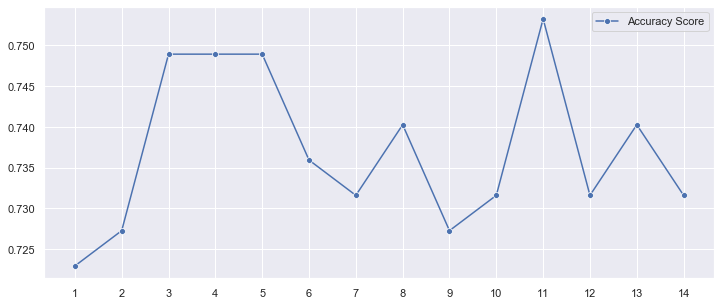

In [79]:
plt.figure(figsize = (12,5))
sns.lineplot( range(1,15), acc_score, marker = 'o', label = 'Accuracy Score')
plt.xticks( range(1,15))
plt.show()

We can see that the best result occurs when K = 11

### Setup KNN classifier with K neighbors

In [81]:
knn  = KNeighborsClassifier(11)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7532467532467533

# Doubt

In [82]:
## trying to plot decision boundary

value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

# Adding axes annotations
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
plt.title('KNN with Diabetes Data')
plt.show()

NameError: name 'plot_decision_regions' is not defined

### Building confusion Matrix

In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
y_pred = knn.predict(X_test)

In [88]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[127,  34],
       [ 23,  47]], dtype=int64)

## Building Classification Report

In [93]:
from sklearn.metrics import classification_report

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       150
           1       0.67      0.58      0.62        81

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



## Building ROC n AUC Curve

In [95]:
from sklearn.metrics import roc_curve

In [96]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [97]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

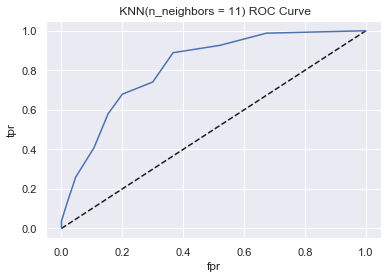

In [100]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label = 'knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(' KNN(n_neighbors = 11) ROC Curve')
plt.show()

In [101]:
# To find the Area under ROC Curve

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba)

0.8152263374485597

## Hyper Parameter Optimization

Grid search is an approach to hyperparameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid.

Let’s consider the following example:

Suppose, a machine learning model X takes hyperparameters a1, a2 and a3. In grid searching, you first define the range of values for each of the hyperparameters a1, a2 and a3. You can think of this as an array of values for each of the hyperparameters. Now the grid search technique will construct many versions of X with all the possible combinations of hyperparameter (a1, a2 and a3) values that you defined in the first place. This range of hyperparameter values is referred to as the grid.

Suppose, you defined the grid as: a1 = [0,1,2,3,4,5] a2 = [10,20,30,40,5,60] a3 = [105,105,110,115,120,125]

Note that, the array of values of that you are defining for the hyperparameters has to be legitimate in a sense that you cannot supply Floating type values to the array if the hyperparameter only takes Integer values.

Now, grid search will begin its process of constructing several versions of X with the grid that you just defined.

It will start with the combination of [0,10,105], and it will end with [5,60,125]. It will go through all the intermediate combinations between these two which makes grid search computationally very expensive.

In [103]:
# IMport GridSearchCV
from sklearn.model_selection import GridSearchCV

In [104]:
# IN case of KNN, the parameter we will we tuning is n_neighbors

params = { 'n_neighbors' : np.arange(1,50)}
knn = KNeighborsClassifier()

knn_cv = GridSearchCV( knn, params, cv = 5)
knn_cv.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [105]:
print('Best Score: ', knn_cv.best_score_)
print('Best Parameter', knn_cv.best_params_)

Best Score:  0.7721354166666666
Best Parameter {'n_neighbors': 25}
